In [1]:
import numpy as np
fruits = np.load('data/fruits_300.npy')

fruits_2d = fruits.reshape(-1, 100*100)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

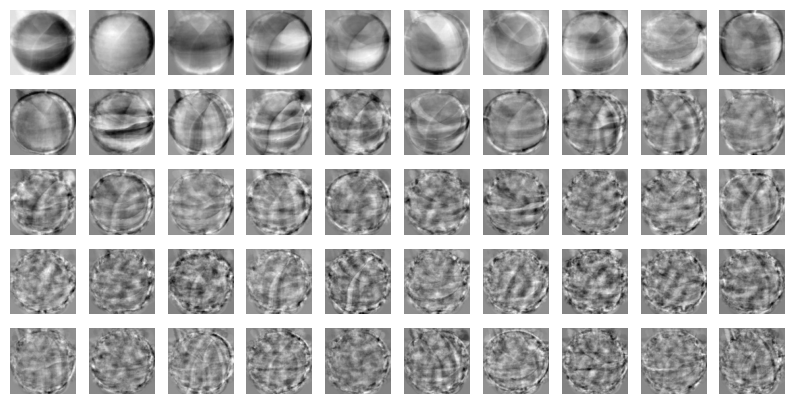

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # 우리가 가진 데이터에서 필요한 부분만 압축하여 저장공간이 크게 늘어남 , 저렇게 압축된 이미지여도 사과인지는 알아 볼 수 있으니깐

(300, 50)

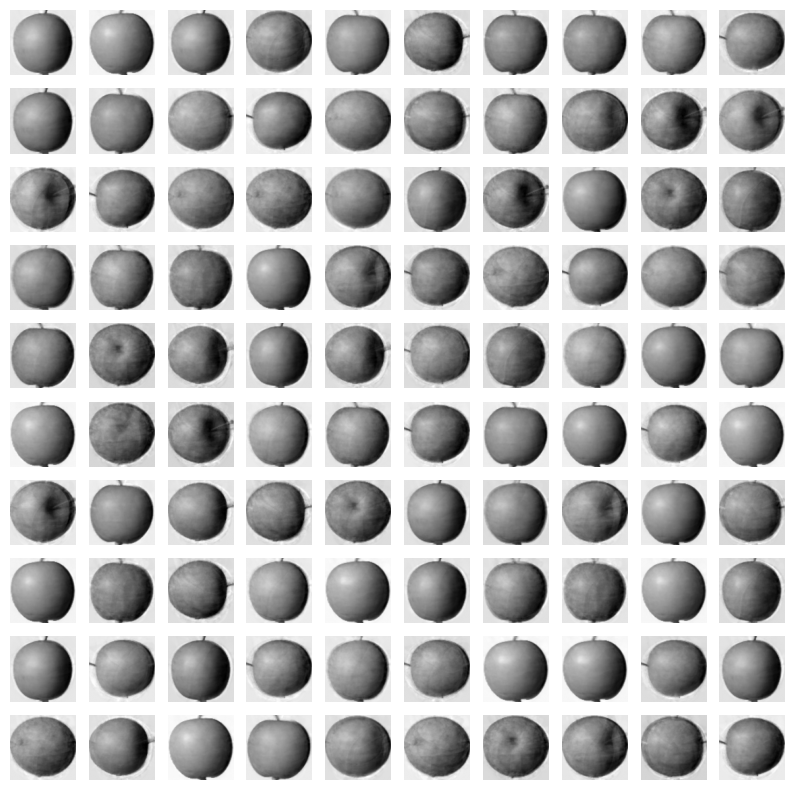

In [14]:
# 압축했다가 다시 복원하고 사진으로 바꾸기
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [18]:
pca.explained_variance_ratio_ # 각각의 픽셀들이 원본의 얼마만큼의 비율인지, 처음의 10개가 가장 중요함

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578894, 0.00511202, 0.00486381, 0.00480346,
       0.00447838, 0.00437315, 0.00408036, 0.00389472, 0.00372438,
       0.00359266, 0.00331416, 0.00317838, 0.00304295, 0.00303717,
       0.00288916, 0.00275726, 0.00264751, 0.0025582 , 0.0025198 ,
       0.00247352, 0.00239513, 0.00230751, 0.00221451, 0.00216754,
       0.0021269 , 0.00195909, 0.00191889, 0.00190708, 0.00183886,
       0.0018153 , 0.00172415, 0.001691  , 0.00162415, 0.00157404])

In [19]:
np.sum(pca.explained_variance_ratio_) # 원본의 얼마만큼의 데이터를 갖고있는지

np.float64(0.9214861108892317)

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100 ) # 지도학습으로 50개의 데이터로 줄인 것도 유용한지 보기

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(scores) # fit_time이 가장중요 0.17초 정도 걸렸다고 생각

{'fit_time': array([0.14538717, 0.15531588, 0.17433333, 0.16810417, 0.16794538]), 'score_time': array([0.00225043, 0.00220513, 0.00230765, 0.00223136, 0.00225711]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.00695372, 0.01316094, 0.01067853, 0.00983286, 0.00824332]), 'score_time': array([0.00073957, 0.0004077 , 0.00051117, 0.00037575, 0.0004468 ]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [26]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
pca.n_components_ # 2개의 데이터를 가지고 50%의 데이터를 맞출 수 있음

np.int64(2)

In [28]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape


(300, 2)

In [30]:
scores = cross_validate(lr, fruits_pca, target)
scores # 속도도 빠르고 점수도 높음

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.07967782, 0.0138514 , 0.01530266, 0.00871181, 0.01630545]),
 'score_time': array([0.00081253, 0.00106192, 0.00110745, 0.00061297, 0.00082254]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [35]:
km.labels_ # 군집화가 됨

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

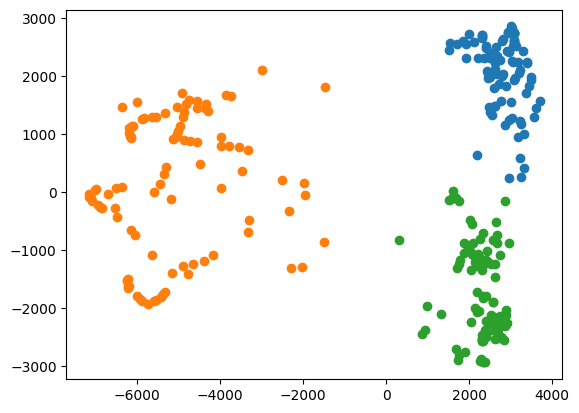

In [37]:
for label in range(3):
    data = fruits_pca[km.labels_ == label] # 0, 1, 2 인거 골라줘
    plt.scatter(data[:, 0], data[:, 1])